In [18]:
#Trasforming Iris data into 3 dimensions and pltting 3D chart

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [19]:
iris_df = pd.read_csv("iris.csv")
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [25]:
feature_data=['sepal.length','sepal.width','petal.length','petal.width']
x=iris_df.loc[:,feature_data].values
y=iris_df.loc[:,['variety']].values

In [21]:
pca=decomposition.PCA(n_components=3) 
components=pca.fit_transform(x)
components_df=pd.DataFrame(components, columns=['component1','component2','component3'])
df=pd.concat([components_df, iris_df[['variety']]], axis = 1)
df

,component1,component2,component3,variety
0,-2.684126,0.319397,-0.027915,Setosa
1,-2.714142,-0.177001,-0.210464,Setosa
2,-2.888991,-0.144949,0.017900,Setosa
3,-2.745343,-0.318299,0.031559,Setosa
4,-2.728717,0.326755,0.090079,Setosa
...,...,...,...,...
145,1.944110,0.187532,0.177825,Virginica
146,1.527167,-0.375317,-0.121898,Virginica
147,1.764346,0.078859,0.130482,Virginica
148,1.900942,0.116628,0.723252,Virginica


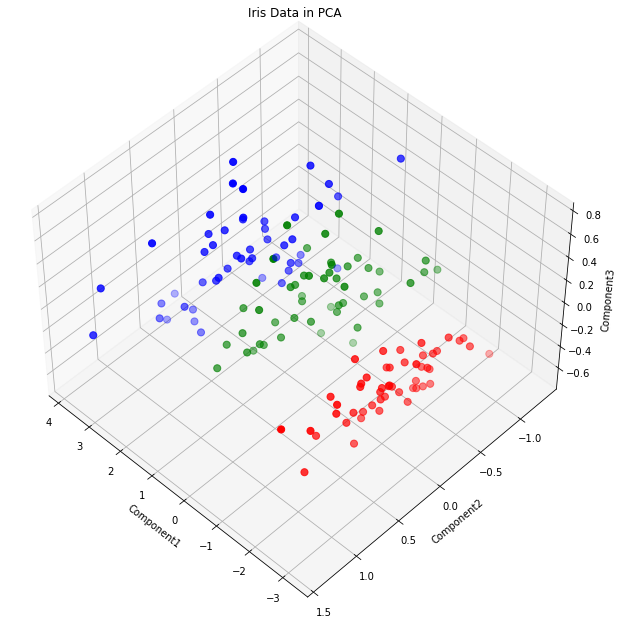

In [24]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, rect=[1,1,1,10], elev=48, azim=134)
ax.set_xlabel('Component1')
ax.set_ylabel('Component2')
ax.set_zlabel('Component3')
ax.set_title("Iris Data in PCA")

variety = ['Setosa', 'Versicolor', 'Virginica']
colors = ['r', 'g', 'b']
for variety, color in zip(variety,colors):
    i = df['variety'] == variety
    ax.scatter(df.loc[i, 'component1'], df.loc[i, 'component2'], df.loc[i, 'component3'], c = color, s = 50)

plt.show()